In [45]:
#@title Bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.tree import export_graphviz
from IPython import display
import matplotlib.pyplot as plt

In [46]:
# Función para generar métricas
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, average=None)))
  print("Recall       : {}".format(recall_score(y_true, y_pred, average=None)))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred, average=None)))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))

In [47]:
# Crear función para visualizar métricas
def fn_metricas_info(modelo, y_verdadero, y_calculado):
    metrics = {
        'Accuracy': "%.5f" % accuracy_score(y_verdadero, y_calculado),
        'Precisión': "{}".format(precision_score(y_verdadero, y_calculado, average=None)),
        'Recall': "{}".format(recall_score(y_verdadero, y_calculado, average=None)),
        'Puntuación F1': "{}".format(f1_score(y_verdadero, y_calculado, average=None)),
        'Cohen Kappa': "{}".format(cohen_kappa_score(y_verdadero, y_calculado))
    }
    return pd.DataFrame(metrics, index=[modelo])

In [48]:
#Cargar base de datos
df = pd.read_csv("C:/Users/ignac/Downloads/tareagit/nba_logreg2.csv", sep = ";")

In [49]:
#Visualización 
print(df.head(5))
print(df.describe())

              Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   

   FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  

[5 rows x 21 columns]
                GP          MIN          PTS          FGM          FGA  \
count  1329.000000  1329.000000  1329.000000

In [50]:
df.info

<bound method DataFrame.info of                  Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   
...               ...  ..   ...  ...  ...  ...   ...      ...  ...   ...  ...   
1324      Chris Smith  80  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  ...   
1325      Brent Price  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  ...   
1326     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  ...   
1327  Litterial Green  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  ...   
1328        Jon Barry  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  ...

In [51]:
#@title Selección de variables continuias
v_con = df.drop(columns = ['Name', 'TARGET_5Yrs'])
v_con
#@title Variables continuas estandarizadas y nuevo df de estas nuevas variables
#Instanciar y aplicar fit_transfor a dataset
data_std =  StandardScaler().fit_transform(v_con)

# Generar dataframe desde los datos estandarizados, agregando nombre de columnas.
df_data_std = pd.DataFrame(data_std, columns=v_con.columns)

df_data_std.iloc[:,:-1].apply(lambda x: np.mean(x))
df_data_std.iloc[:,:-1].apply(lambda x: np.var(x))

GP         1.0
MIN        1.0
PTS        1.0
FGM        1.0
FGA        1.0
FG%        1.0
3P Made    1.0
3PA        1.0
3P%        1.0
FTM        1.0
FTA        1.0
FT%        1.0
OREB       1.0
DREB       1.0
REB        1.0
AST        1.0
STL        1.0
BLK        1.0
dtype: float64

In [52]:
#@title Número de componentes criterio de Kaiser
autovalores = np.linalg.eigvals(np.corrcoef(df_data_std.T))

print(f'Los autovalores son los siguientes: {autovalores}')

# Filtro limite KMO
autovalores_kaiser = autovalores[autovalores>=0.8]

# Cantidad autovalores
cantidad_autovalores_kaiser = len(autovalores_kaiser)
print('\n')
print(f'La cantidad de componentes a utilizar asciende a {cantidad_autovalores_kaiser}')

Los autovalores son los siguientes: [9.53440739e+00 3.89576387e+00 1.22828525e+00 8.73721288e-01
 7.43362340e-01 5.92776409e-01 5.01883433e-01 4.47004447e-01
 3.97857000e-01 2.60638621e-01 2.32392775e-01 1.10082884e-01
 1.00032583e-01 5.42374042e-02 1.46881655e-02 7.66798157e-03
 4.66150605e-03 1.68631927e-04 3.68022435e-04]


La cantidad de componentes a utilizar asciende a 4


In [53]:
#@title Varianza explicada de los componentes
varianza_explicada=[]
varianza_explicada_acum =[]

# Loop para capturar la varianza explicada y la varianza explicada acumulada
for i in autovalores:
    varianza_explicada.append((i)/sum(autovalores)*100)
    varianza_explicada_acum.append(sum(varianza_explicada))


# Generar DataFrame
matriz_var_expl = pd.DataFrame({'pct_var_expl': varianza_explicada,
                                'pct_var_expl_acum': varianza_explicada_acum
                               },
                               index=np.linspace(1,len(autovalores), len(autovalores)))


# Usamos la cantidad de autovalores que nos arrojo el criterio de Kaiser.
matriz_var_expl.iloc[:,0:cantidad_autovalores_kaiser]

,pct_var_expl,pct_var_expl_acum
1.0,50.181092,50.181092
2.0,20.504020,70.685112
3.0,6.464659,77.149771
4.0,4.598533,81.748304
5.0,3.912433,85.660738
6.0,3.119876,88.780613
7.0,2.641492,91.422105
8.0,2.352655,93.774760
9.0,2.093984,95.868744
10.0,1.371782,97.240527


In [54]:
#@title PCA según el criterio de Kaiser en un DataFrame con semilla 2021
# Criterio de Kaiser nos indica que son 4 las componentes.
pca = PCA(n_components=4)

In [55]:
#@title Filt Transfor a dataset Normalizado.Generamos dataset reducido
pca_2 = pca.fit_transform(data_std)

In [56]:
#@title Generar DataFrame de las componentes calculadas
columnas = ['CP1', 'CP2','CP3', 'CP4']
df_pca_2 = pd.DataFrame(pca_2 , columns=columnas)

# Data reducida en sus dimensionalidades
df_pca_2.head(5)

,CP1,CP2,CP3,CP4
0,0.752446,1.225623,1.417699,1.114709
1,1.369880,2.999660,0.155570,1.606580
2,-0.978817,0.797069,0.579092,-0.059004
3,-1.390802,0.113382,-0.352939,-0.047073
4,-1.641404,-1.865789,-0.223249,-0.291817


In [57]:
# Generar DataFrame con los loading
df_loading = pd.DataFrame(pca.components_.T, columns=['CP 1', 'CP 2', 'CP 3', 'CP 4'], index=df_data_std.columns)
df_loading

,CP 1,CP 2,CP 3,CP 4
GP,0.200870,-0.014494,-0.139321,-0.360107
MIN,0.307752,0.070219,0.036731,0.039371
PTS,0.312648,0.053879,0.009937,-0.022884
FGM,0.308814,0.028995,-0.004130,-0.017736
FGA,0.302246,0.100608,0.004719,0.031231
FG%,0.100517,-0.298281,-0.025214,-0.283462
3P Made,0.088462,0.397269,0.421023,0.058223
3PA,0.091705,0.409117,0.387372,0.094306
3P%,0.027882,0.356375,0.274381,-0.140869
FTM,0.291140,-0.013980,-0.107023,-0.062650


In [58]:
#@title Calculo de las componentes principales para cada valor
puntajes = np.dot(df_data_std, pca.components_.T)

In [59]:
#@title Valor de las componentes principales para cada observación (principal component scores)
df_puntajes = pd.DataFrame(puntajes, columns=['CP 1', 'CP 2', 'CP 3', 'CP 4'] ,index = df_data_std.index)
df_puntajes

,CP 1,CP 2,CP 3,CP 4
0,0.752446,1.225623,1.417699,1.114709
1,1.369880,2.999660,0.155569,1.606580
2,-0.978817,0.797069,0.579092,-0.059004
3,-1.390802,0.113382,-0.352939,-0.047073
4,-1.641404,-1.865789,-0.223249,-0.291817
...,...,...,...,...
1324,-1.326350,0.384773,-1.591338,-1.080821
1325,-1.561167,1.274796,-1.377610,-0.279668
1326,-1.071185,-2.489702,0.220311,-0.041185
1327,-2.163738,-0.003823,-1.332926,0.609726


In [ ]:
#MODELO LAZZY

In [74]:
!pip install lazypredict

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached lightgbm-4.4.0-py3-none-win_amd64.whl (1.4 MB)


In [75]:
from lazypredict.Supervised import LazyClassifier

In [76]:
#@title Particiomanos nuestros datos
X = df_puntajes
y = df['TARGET_5Yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state =0)

In [77]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.40it/s]

[LightGBM] [Info] Number of positive: 664, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1063, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624647 -> initscore=0.509321
[LightGBM] [Info] Start training from score 0.509321


In [78]:
best_model_name = models.index[0]
best_model = models.iloc[0]
accuracy = best_model['Accuracy']
print(f"El mejor modelo es {best_model_name} con una precisión de {accuracy:.2f}")

El mejor modelo es NearestCentroid con una precisión de 0.73


In [60]:
#@title Particiomanos nuestros datos
X = df_puntajes
y = df['TARGET_5Yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state =0)

In [79]:
#@title Modelo supervisado Random Forest
#Instanciar algoritmo de clasificación RFC
rfc_clf = RandomForestClassifier()
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)

In [80]:
#@title Generamos predicciones con datos test
y_pred_rfc = classifier.predict(X_test)

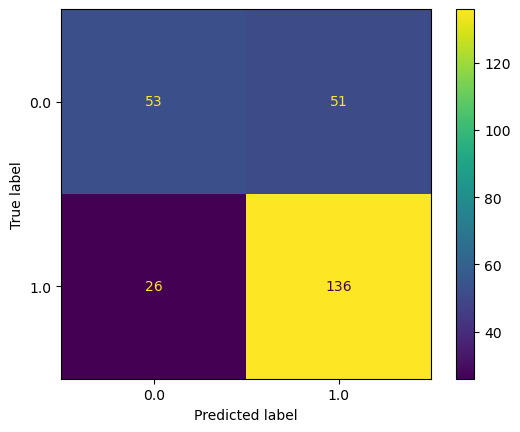

In [81]:
#@title Matriz de confusión visualmente
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
cm_display = ConfusionMatrixDisplay(cm, display_labels=df['TARGET_5Yrs'].unique()).plot()

In [82]:
#@title Métricas
fn_metricas_clasificacion(y_test, y_pred_rfc)

Accuracy     : 0.711
Precisión    : [0.67088608 0.72727273]
Recall       : [0.50961538 0.83950617]
Puntuación F1: [0.57923497 0.77936963]
Cohen Kappa  : 0.3648204428456242


In [83]:
#@title Ajustes de Hiperparámetros
from sklearn.model_selection import GridSearchCV

# Generar las particiones
particiones = KFold(n_splits=10, shuffle=True, random_state=0)

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth' : [5,10,15],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [6,8,12],
    'min_samples_leaf': [4,8,12],
}

# Instanciar el modelo sin hiperparámetros
rf_clf = RandomForestClassifier(class_weight='balanced')

# Aplicar GridSearchCV  usando el diccionario de hiperparámetros
mejor_modelo_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=particiones, scoring='accuracy')

# Entrenar el modelo con datos train
mejor_modelo_rfc.fit(X_train, y_train)

# Obtener los mejores parámetros
mejor_modelo_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 12,
 'n_estimators': 25}

In [84]:
#@title Vemos los mejores hiperparametros
mejor_modelo_rfc.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=8, min_samples_split=12,
                       n_estimators=25)

In [85]:
#@title Obtener el mejor modelo
modelo_final = mejor_modelo_rfc.best_estimator_
# Obtener predicciones con el set de test
y_pred = modelo_final.predict(X_test)
# Imprimir reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.63      0.65       104
         1.0       0.77      0.79      0.78       162

    accuracy                           0.73       266
   macro avg       0.72      0.71      0.71       266
weighted avg       0.73      0.73      0.73       266



In [86]:
#@title Métricas del modelo
metrica_rfs = fn_metricas_info('random_forest', y_test, y_pred)
metrica_rfs

,Accuracy,Precisión,Recall,Puntuación F1,Cohen Kappa
random_forest,0.72932,[0.66 0.77108434],[0.63461538 0.79012346],[0.64705882 0.7804878 ],0.4276834807554387
